In [2]:
# Import all the necessary libraries
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score, recall_score, f1_score,ConfusionMatrixDisplay,classification_report


import warnings 
warnings.filterwarnings("ignore")

In [3]:
cri_compustat_merged = pd.read_pickle("cri_compustat_merged_v7.pkl")
cri_compustat_merged.shape[0]

1253426

In [4]:
cri_compustat_merged['tic']

0          CDSI.2
1            DXPE
2            ZICA
3            XLTC
4            MRYP
            ...  
1253421        DE
1253422       WSM
1253423       DDS
1253424       BBY
1253425      DXLG
Name: tic, Length: 1253426, dtype: object

In [5]:
yfinance = pd.read_pickle("final_yfiance.pkl")
yfinance.shape

FileNotFoundError: [Errno 2] No such file or directory: 'final_yfiance.pkl'

In [6]:
yfinance = yfinance.rename(columns={"yyyy":"year"})
yfinance = yfinance.rename(columns={"mm":"month"})
yfinance

NameError: name 'yfinance' is not defined

In [7]:
cri_compustat_yfinance = cri_compustat_merged.merge(yfinance, on=['tic','year','month'], how='inner')

NameError: name 'yfinance' is not defined

In [45]:
cri_compustat_yfinance.shape[0]

612959

In [72]:
cri_compustat_yfinance.isna().sum()

CompNo                         0
year                           0
month                          0
StkIndx                        0
STInt                          0
dtdlevel                       0
dtdtrend                       0
liqnonfinlevel                 0
liqnonfintrend                 0
ni2talevel                     0
ni2tatrend                     0
sizelevel                      0
sizetrend                      0
m2b                            0
sigma                          0
liqfinlevel                    0
lqfintrend                     0
DTDmedianFin                   0
DTDmedianNonFin                0
dummy297fin                    0
Default                        0
day                            0
date                           0
StartDate                      0
EventDate                      0
Duration                       0
gvkey                          0
current_ratio                  0
quick_ratio                    0
cash_ratio                     0
net_workin

In [46]:
cri_compustat_yfinance.dropna(inplace=True)

In [47]:
cri_compustat_merged = cri_compustat_yfinance

In [8]:
cri_compustat_merged['EventDate']

0         2000-01-31
1         2000-01-31
2         2000-01-31
3         2000-01-31
4         2000-01-31
             ...    
1253421   2023-07-31
1253422   2023-07-31
1253423   2023-07-31
1253424   2023-07-31
1253425   2023-07-31
Name: EventDate, Length: 1253426, dtype: datetime64[ns]

In [9]:
#refactor
cols = list(cri_compustat_merged.columns)

cri_compustat_merged.sort_values(by='EventDate', inplace=True)
date2022 = datetime.datetime(2022, 1, 1)
date2020 = datetime.datetime(2020,1,1)
train_df = cri_compustat_merged[cri_compustat_merged["EventDate"] < date2020]
validation_df = cri_compustat_merged[(cri_compustat_merged["EventDate"] >= date2020) & (cri_compustat_merged["EventDate"] < date2022)]
test_df = cri_compustat_merged[cri_compustat_merged["EventDate"] >= date2022]

In [10]:
len(cri_compustat_merged[cri_compustat_merged['Default'] == 1])/len(cri_compustat_merged)*100

0.7586407175214173

In [11]:
len(validation_df[validation_df['Default'] == 1])/len(validation_df) *100

0.4748850238940572

In [12]:
len(test_df[test_df['Default'] == 1])/len(test_df) *100

0.4262326842972004

In [13]:
cri_compustat_merged[cri_compustat_merged['Default'] == 1]

,CompNo,year,month,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,...,working_capital_turnover,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,operating_profit_margin,ebitda_margin,debt_service_coverage_ratio,interest_coverage_ratio,sic_2
3939,28611,2000.0,1,0.089239,0.011089,0.756315,0.546429,0.301765,0.286080,-0.014388,...,-1.195807,44.791667,0.225421,0.774579,22.569356,-5.791551e+01,-5.026128e+01,-0.204349,3.508621,49.0
3960,34602,2000.0,1,0.089239,0.011089,0.980684,-0.365880,-0.033778,-0.118834,-0.001747,...,1.573741,-1.875000,-0.000000,1.000000,33.220235,-8.781080e+01,-8.606458e+01,-0.980703,-6.932852,57.0
3982,40983,2000.0,1,0.089239,0.011089,0.287877,-0.785039,1.117781,-0.134035,-0.002720,...,-2.546999,-0.128240,-0.000000,1.000000,64.491489,-4.249063e+00,3.802359e+01,-0.027480,8.689003,56.0
4257,27240,2000.0,1,0.089239,0.011089,1.608767,-0.579390,0.546160,0.131284,-0.001938,...,2.072832,-0.714286,-0.000000,1.000000,6.380575,-1.007847e+02,-9.646779e+01,-0.394548,-1.173697,10.0
4113,41332,2000.0,1,0.089239,0.011089,-0.340560,-0.124496,-1.022922,0.060817,-0.041892,...,-2.547920,-0.117647,-0.000000,1.000000,8.790602,-8.241880e+01,-7.466927e+01,-149041.103448,8.268191,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246220,30473,2023.0,3,-0.092950,0.007115,-0.761189,-0.147672,1.021671,-0.218530,-0.034514,...,-0.483450,-0.176829,-0.000000,1.000000,27.335511,-7.955085e+01,-7.106463e+01,-0.100127,-0.365241,28.0
1244161,27346,2023.0,3,-0.092950,0.007115,-1.113511,0.000000,0.098426,0.000000,-0.016226,...,7.346535,-0.857143,-0.000000,1.000000,28.008907,-6.484238e+01,-6.139693e+01,-0.208368,0.744811,35.0
1244707,46481,2023.0,3,-0.092950,0.007115,0.622700,-0.098017,1.692032,0.166245,-0.036078,...,0.000000,-0.868966,-0.000000,1.000000,22.282769,-2.189250e+07,-2.185540e+07,-1.577718,-33.092024,28.0
1247849,27346,2023.0,4,-0.027527,0.008456,-1.113511,-0.055722,0.098426,0.000000,-0.016226,...,7.346535,-0.857143,-0.000000,1.000000,28.008907,-6.484238e+01,-6.139693e+01,-0.208368,0.744811,35.0


In [14]:
cri_compustat_merged.columns

Index(['CompNo', 'year', 'month', 'StkIndx', 'STInt', 'dtdlevel', 'dtdtrend',
       'liqnonfinlevel', 'liqnonfintrend', 'ni2talevel', 'ni2tatrend',
       'sizelevel', 'sizetrend', 'm2b', 'sigma', 'liqfinlevel', 'lqfintrend',
       'DTDmedianFin', 'DTDmedianNonFin', 'dummy297fin', 'Default', 'day',
       'date', 'StartDate', 'EventDate', 'Duration', 'gvkey', 'tic',
       'current_ratio', 'quick_ratio', 'cash_ratio', 'net_working_capital',
       'debt_ratio', 'debt_to_equity_ratio', 'equity_ratio',
       'cashflow_to_debt_ratio', 'net_profit_margin', 'return_on_assets',
       'asset_turnover', 'inventory_turnover', 'days_in_inventory',
       'receivables_turnover', 'day_sales_outstanding',
       'working_capital_turnover', 'price_to_earnings',
       'dividend_payout_ratio', 'retention_ratio', 'gross_margin_ratio',
       'operating_profit_margin', 'ebitda_margin',
       'debt_service_coverage_ratio', 'interest_coverage_ratio', 'sic_2'],
      dtype='object')

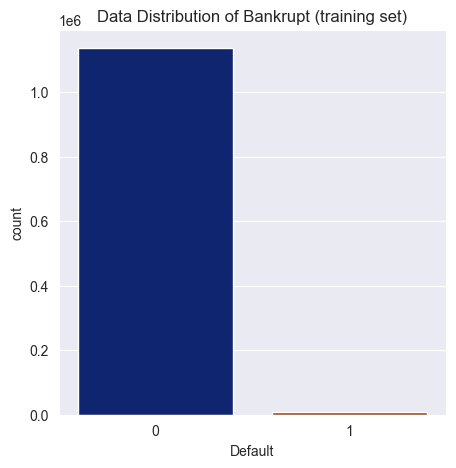

Imbalance Ratio is:126.03870896184561
 % of default is :0.007871616518870141


In [15]:
plt.figure(figsize=(5,5))
sns.countplot(x=train_df["Default"], palette="dark")
plt.title("Data Distribution of Bankrupt (training set)")
plt.show()
majority_class_samples=train_df["Default"].loc[train_df["Default"]==0]
minority_class_samples=train_df["Default"].loc[train_df["Default"]==1]
Imbalance_Ratio= len(majority_class_samples)/len(minority_class_samples)
percentage = len(minority_class_samples)/(len(minority_class_samples)+len(majority_class_samples))
print(f"Imbalance Ratio is:{Imbalance_Ratio}")
print(f" % of default is :{percentage}") 

In [16]:
# drop unecessary columns
train_df.drop(["CompNo", "year", "month", "day", "date"], axis=1, inplace=True)
validation_df.drop(["CompNo", "year", "month", "day", "date"], axis=1, inplace=True)
test_df.drop(["CompNo", "year", "month", "day", "date"], axis=1, inplace=True)

In [17]:
x_train = train_df.drop('Default', axis=1)
y_train = train_df['Default']
x_validation = validation_df.drop('Default', axis=1)
y_validation = validation_df['Default']
x_test = test_df.drop('Default', axis=1)
y_test = test_df["Default"]

In [18]:
def get_num_cat_columns(dataframe):
    categorical_cols=dataframe.select_dtypes(include="object").columns
    numerical_cols=dataframe.select_dtypes(exclude="object").columns
    
    return categorical_cols, numerical_cols

In [19]:
categorical_cols, numerical_cols= get_num_cat_columns(x_train)

In [20]:
def Winsorization_Method(columns, x_train, y_train , a, b):
    outliers=[]

    for col in columns:
        q1= np.percentile(x_train[col], a)
        q2= np.percentile(x_train[col],b)
        
        for pos in range(len(x_train)):
            if x_train[col].iloc[pos]>q2 or x_train[col].iloc[pos]<q1:
                outliers.append(pos) 
                
    outliers= set(outliers)                   # remove the duplicates from the outliers
    outliers= list(outliers)
    
    ratio= round(len(outliers)/len(x_train)*100, 2)                       # Ratio of outliers
    x_train.drop(x_train.index[outliers], inplace=True)    # remove the outliers from the training dataset
    y_train.drop(y_train.index[outliers], inplace=True)
    
    
    
    return ratio, x_train, y_train

In [21]:
ratio, x_train, y_train= Winsorization_Method(numerical_cols, x_train, y_train,a=0.3,b=99.7)
print(f"Ratio of Outliers Detected in the dataset:{ratio}")

KeyboardInterrupt: 

In [22]:
# shape of data after removing the outliers in the training data
x_train.shape,x_test.shape,x_validation.shape ,y_train.shape, y_test.shape, y_validation.shape

((1145381, 47), (41292, 47), (66753, 47), (1145381,), (41292,), (66753,))

In [25]:
x_train.to_csv("../Dataset/" + "X_train_winsorized.csv", index=False)

In [26]:
x_test.to_csv("../Dataset/" + "X_test.csv", index=False)

In [27]:
x_validation.to_csv("../Dataset/" + "X_validation.csv", index=False)

In [28]:
y_train.to_csv("../Dataset/" + "Y_train_winsorized.csv", index=False)

In [29]:
y_test.to_csv("../Dataset/" + "Y_test.csv", index=False)

In [30]:
y_validation.to_csv("../Dataset/" + "Y_validation.csv", index=False)